<a href="https://colab.research.google.com/github/yanyan0812/yanyan0812/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.14.0


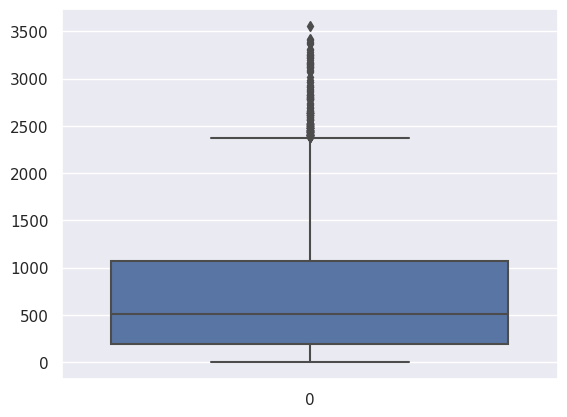

ADF Statistic: -6.946971
p-value: 0.000000


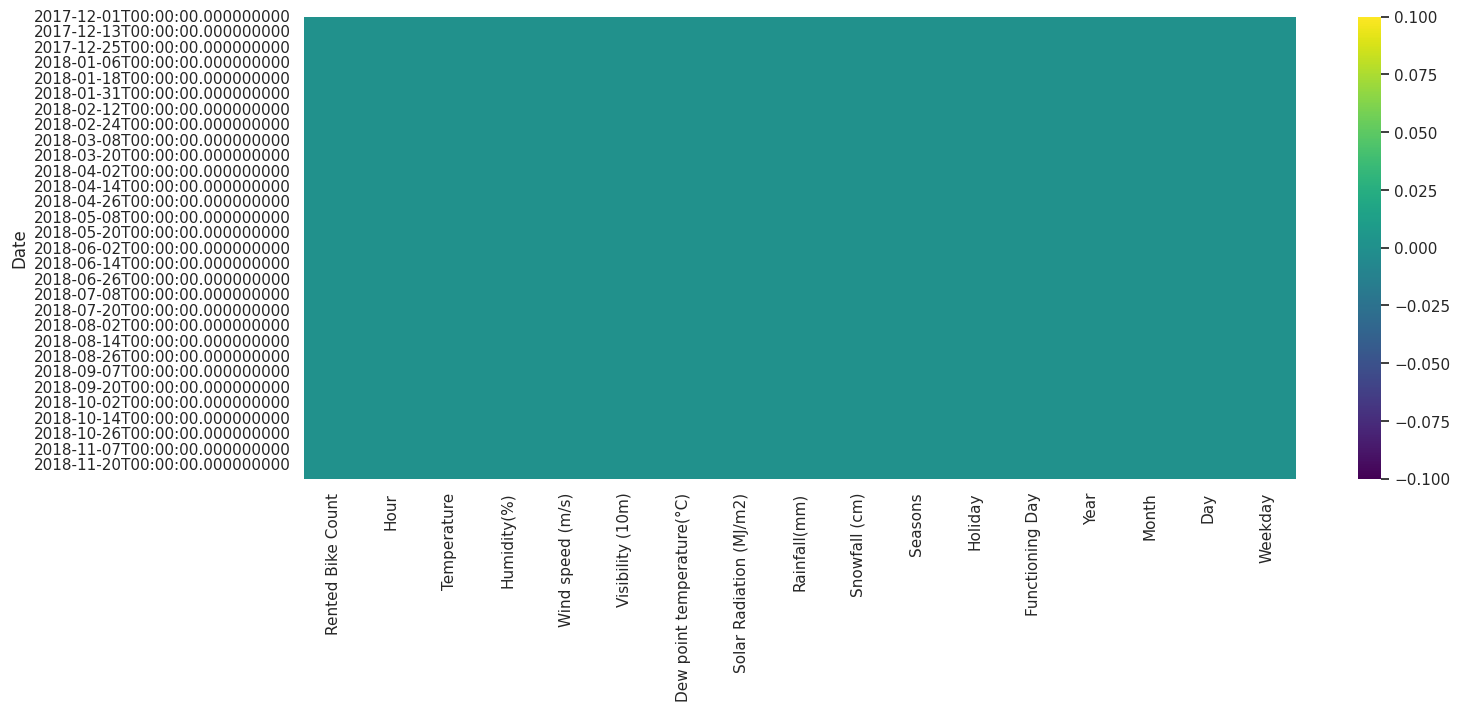

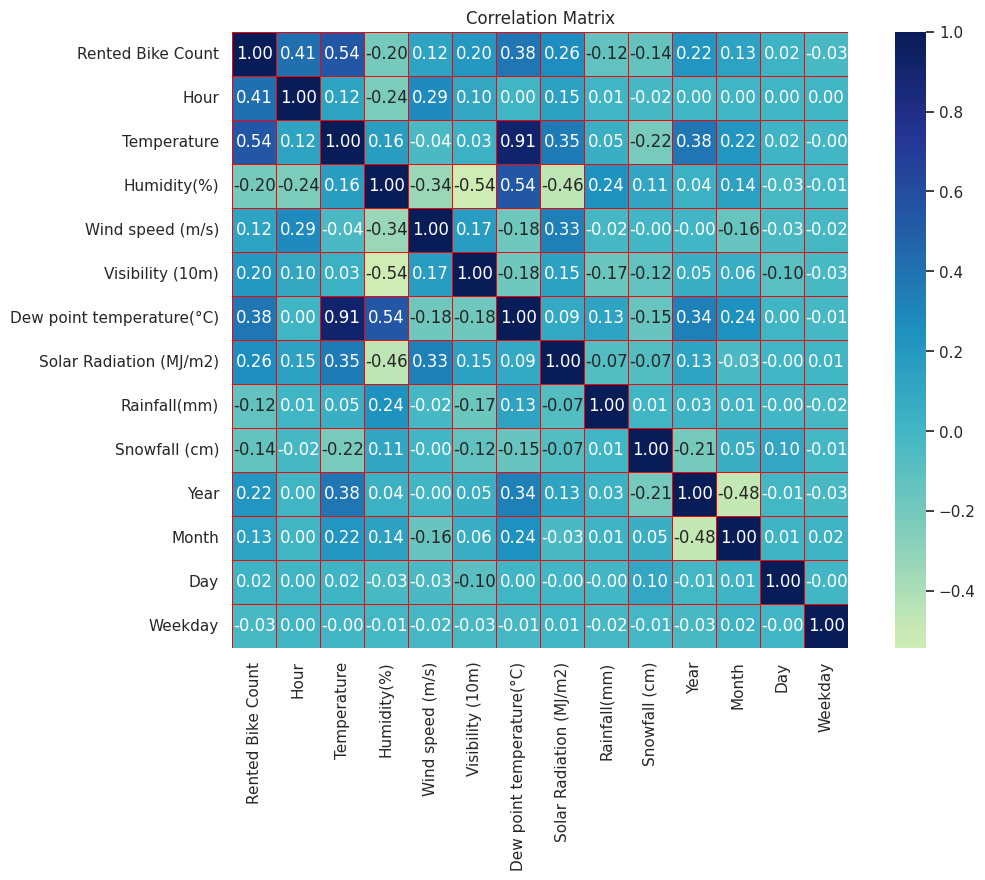

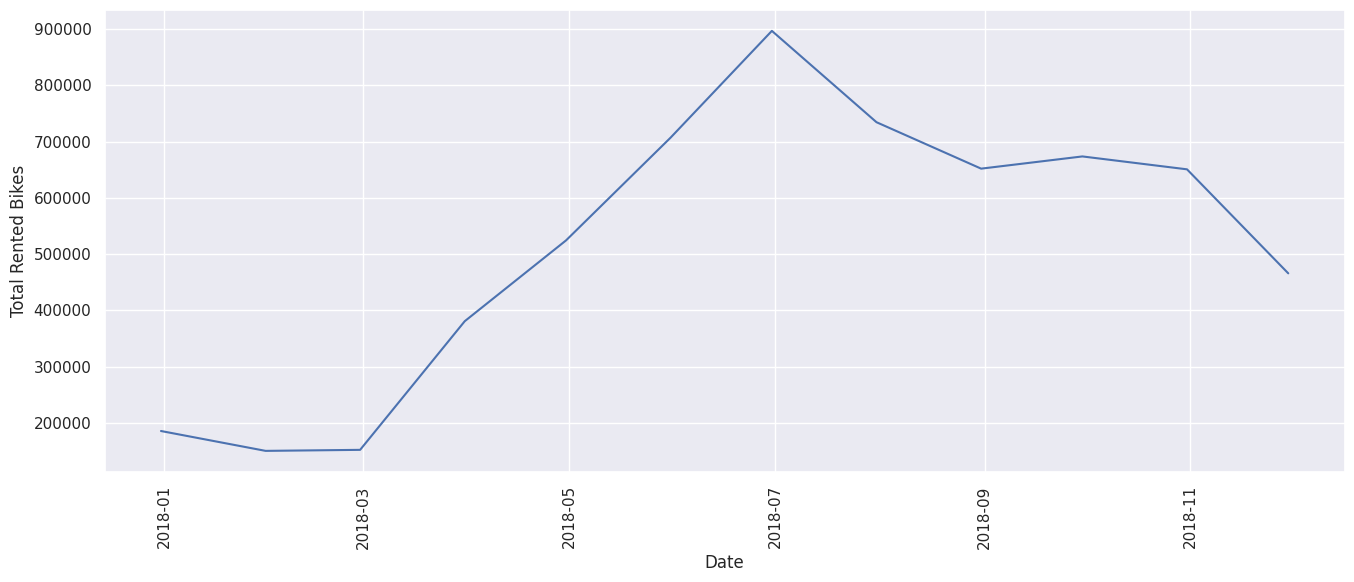

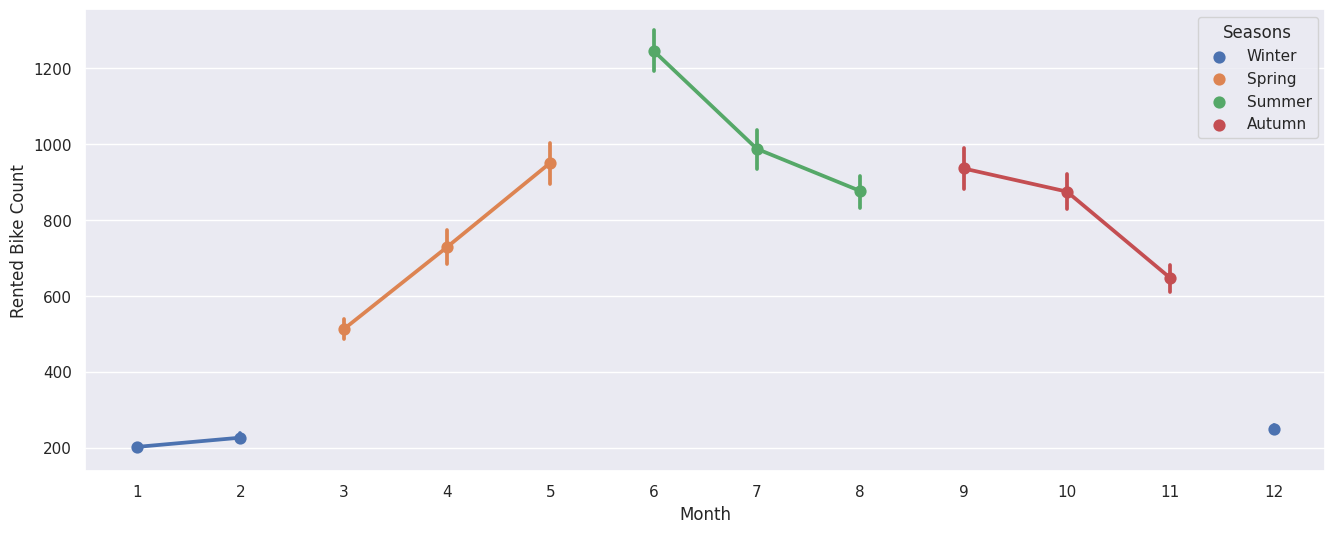

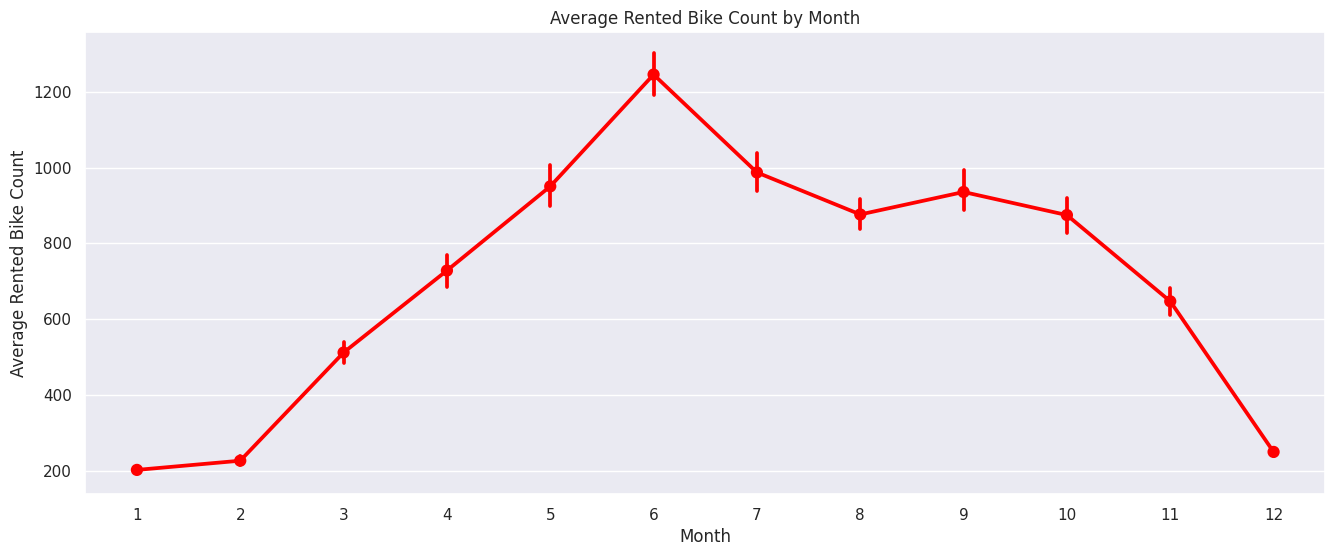

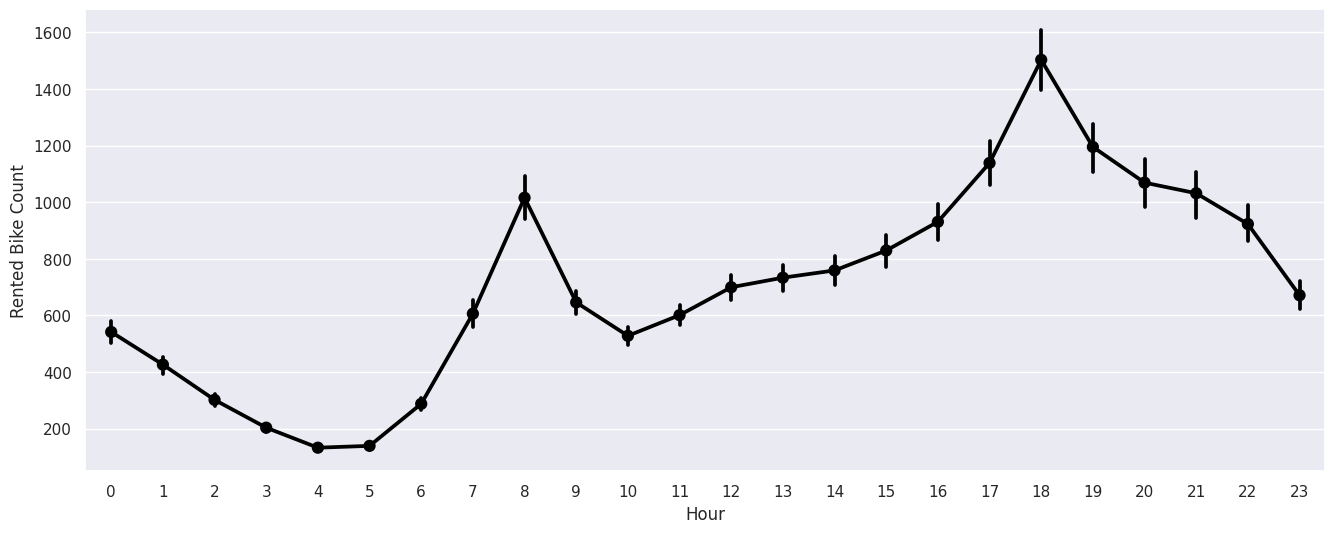

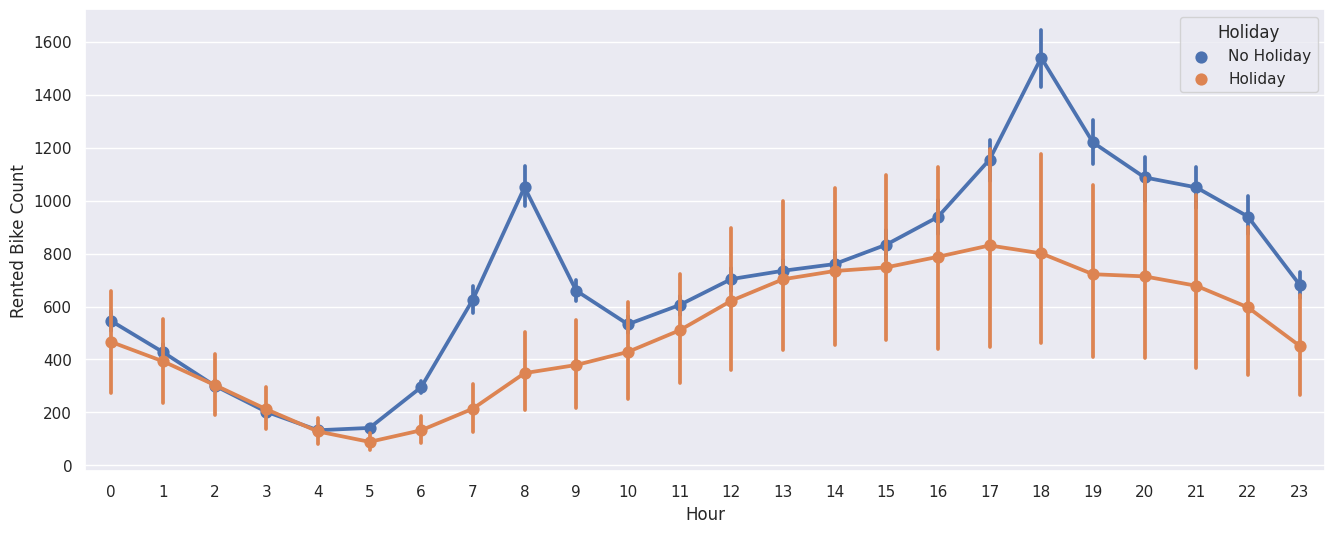

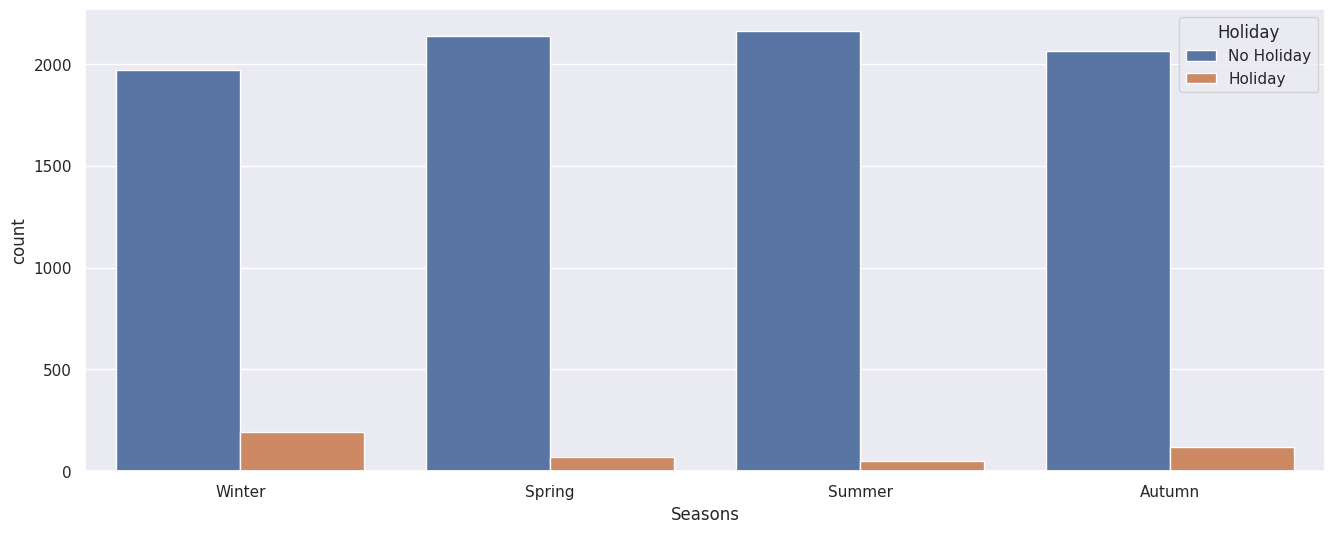

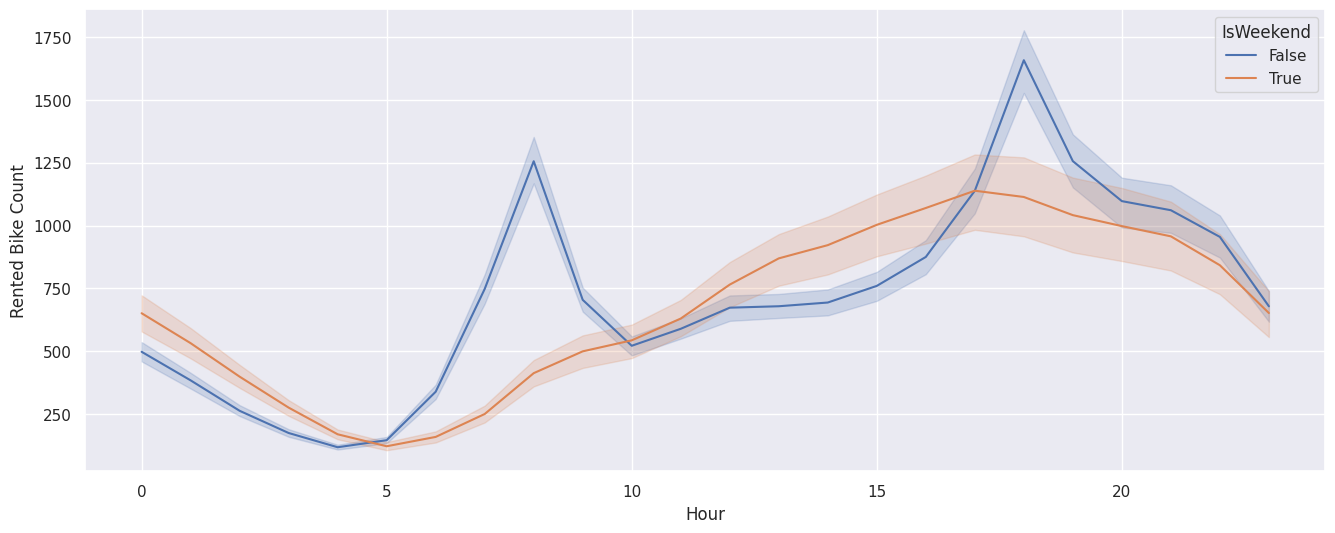

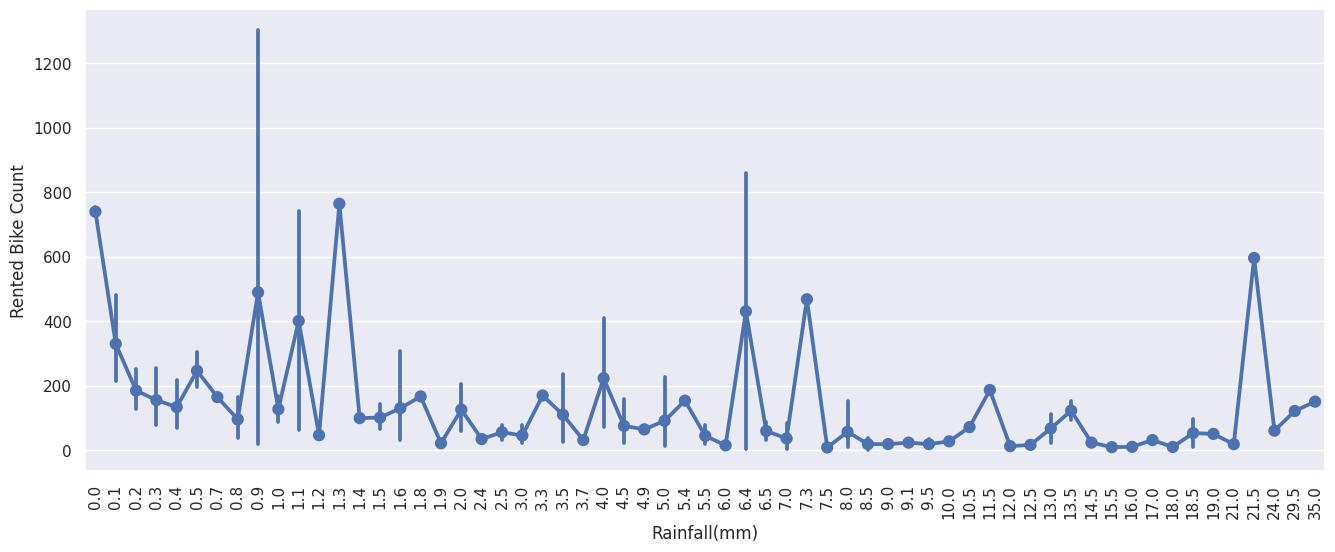

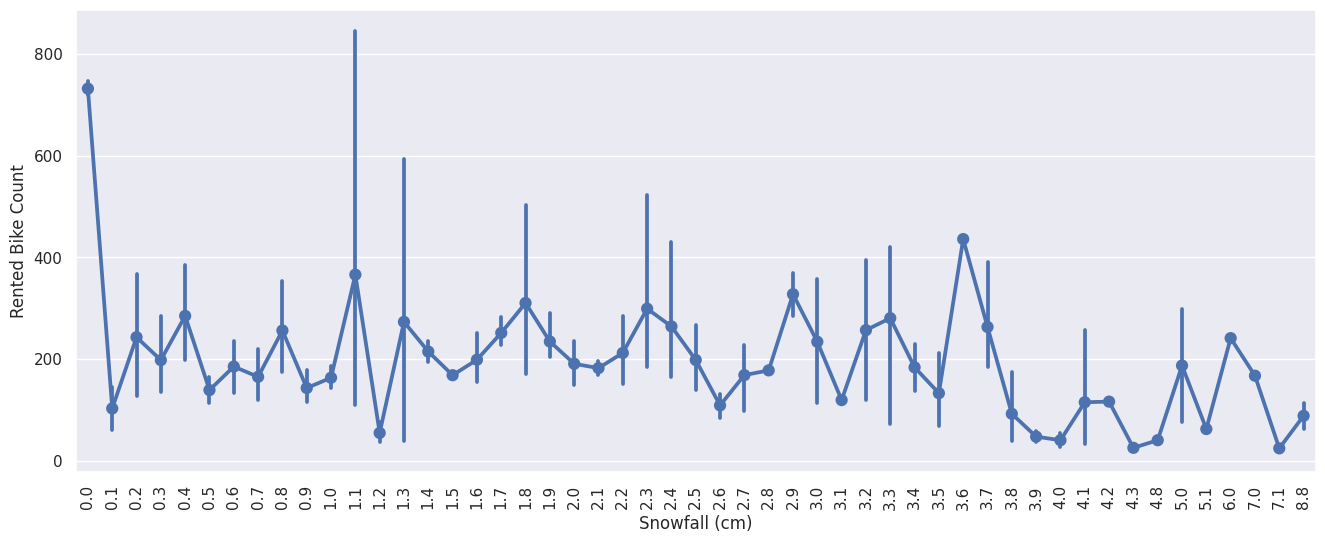

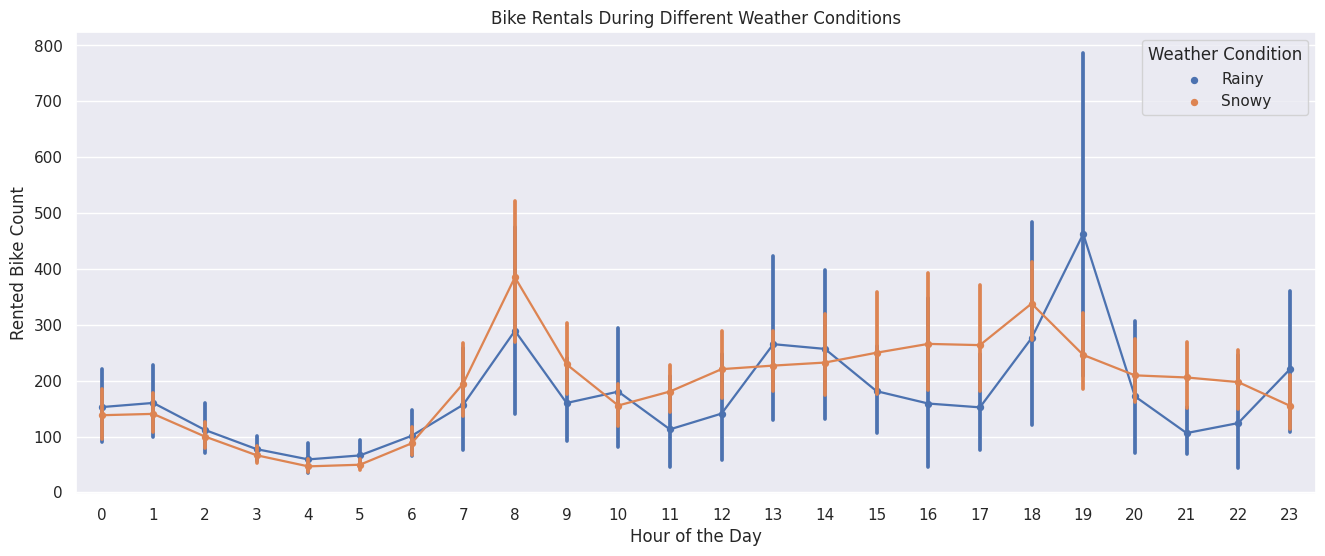

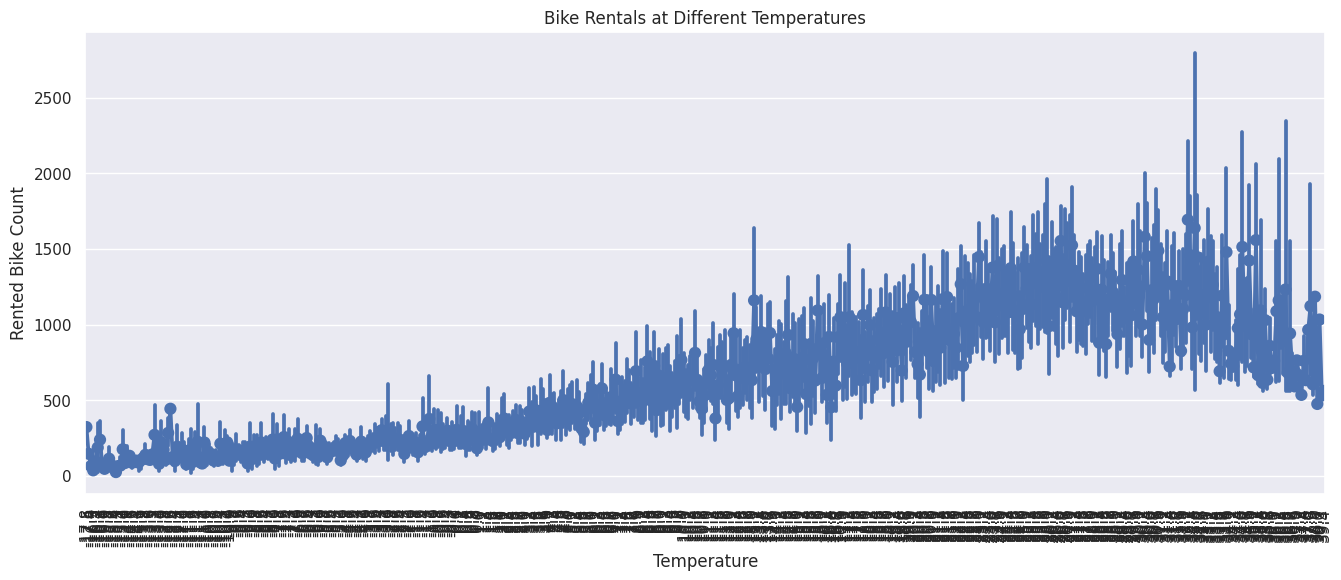

(7884, 14)
(876, 14)
Epoch 1/100
222/222 [==============================] - 9s 20ms/step - loss: 0.0356 - val_loss: 0.0339
Epoch 2/100
222/222 [==============================] - 4s 18ms/step - loss: 0.0336 - val_loss: 0.0338
Epoch 3/100
222/222 [==============================] - 5s 24ms/step - loss: 0.0333 - val_loss: 0.0338
Epoch 4/100
222/222 [==============================] - 5s 24ms/step - loss: 0.0333 - val_loss: 0.0338
Epoch 5/100
222/222 [==============================] - 4s 16ms/step - loss: 0.0331 - val_loss: 0.0338
Epoch 6/100
222/222 [==============================] - 4s 16ms/step - loss: 0.0331 - val_loss: 0.0338
Epoch 7/100
222/222 [==============================] - 5s 22ms/step - loss: 0.0331 - val_loss: 0.0338
Epoch 8/100
222/222 [==============================] - 4s 17ms/step - loss: 0.0329 - val_loss: 0.0338
Epoch 9/100
222/222 [==============================] - 5s 20ms/step - loss: 0.0330 - val_loss: 0.0338
Epoch 10/100
222/222 [==============================] - 5s 22

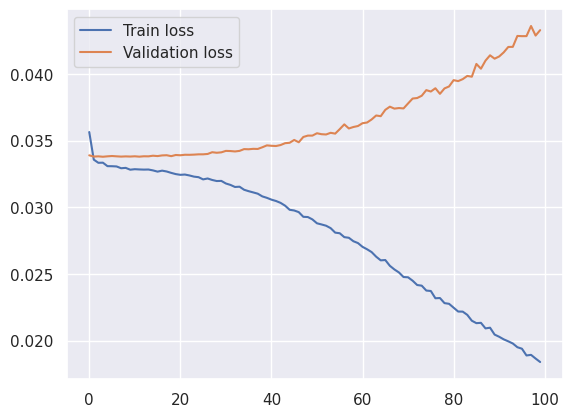

28/28 [==============================] - 1s 6ms/step
RMSE: 762.9239501953125
R2 Score: -0.3727549038335325


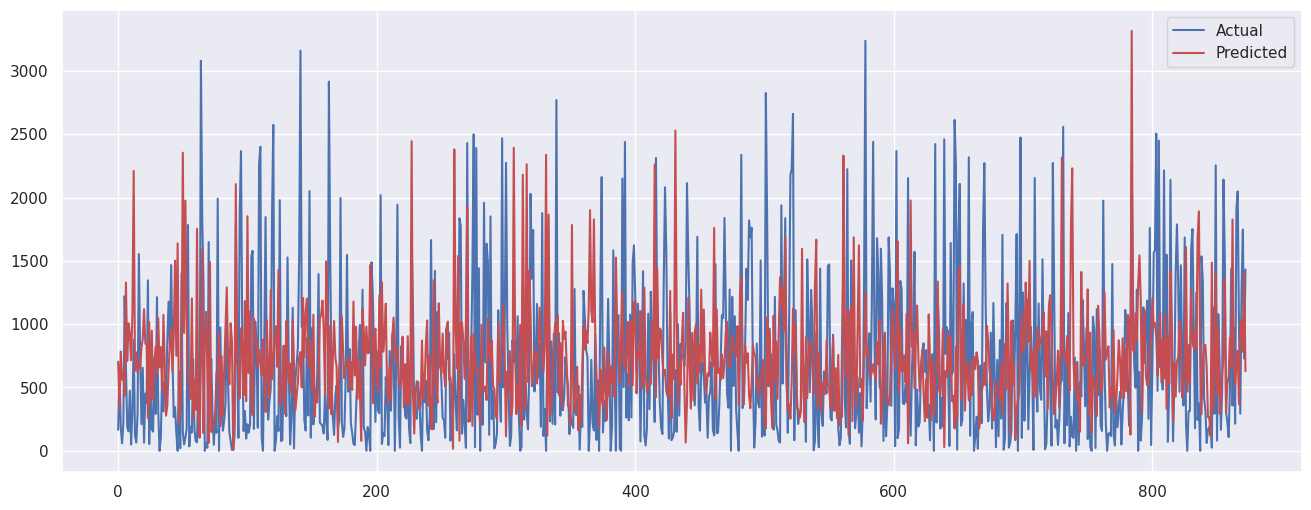

In [16]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Print TensorFlow version
print(tf.__version__)

# Load the dataset
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# Set the style for Seaborn and Matplotlib
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

# Set the 'Date' column as the time index and specify the date format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')

# Create time-related features if needed
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday

# Visualize the data to check for outliers
sns.boxplot(data=data['Rented Bike Count'])
plt.show()

# Perform a stationarity test of the time series
result = adfuller(data['Rented Bike Count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If not stationary, then difference the data
if result[1] > 0.05:
    data['Rented Bike Count'] = data['Rented Bike Count'].diff().dropna()

    # Test stationarity again
    result = adfuller(data['Rented Bike Count'].dropna())
    print('ADF Statistic after differencing: %f' % result[0])
    print('p-value after differencing: %f' % result[1])

# Display the first few rows of the dataset
data.head()

# Plot heatmap to visualize missing values
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), cmap="viridis")
plt.show()

# Calculate the correlation matrix and specify numeric_only=True
corr_matrix = data.corr(numeric_only=True)

# Use seaborn to draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", square=True, linewidths=.5, annot=True, fmt=".2f", center=0, linecolor="red")
plt.title("Correlation Matrix")
plt.show()

# Resample 'Rented Bike Count' column by month and sum
df_by_month = data['Rented Bike Count'].resample("M").sum()

# Plot a line chart
plt.figure(figsize=(16,6))
sns.lineplot(x=df_by_month.index, y=df_by_month)
plt.xticks(rotation=90)
plt.ylabel('Total Rented Bikes')
plt.show()

# If your datetime data is in the index
data['Month'] = data.index.month

# Or if the datetime data is in a column named 'Date'
# data['Month'] = pd.to_datetime(data['Date']).dt.month

# Then create a point plot
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, hue='Seasons', y='Rented Bike Count', x='Month')
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.show()

data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Format the date to match the format in your data

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Use Seaborn to create a point plot
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Month', y='Rented Bike Count', color="red")
plt.title("Average Rented Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Rented Bike Count")
plt.show()

# Create a point plot for 'Hour' vs 'Rented Bike Count'
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', color="black")

# Assume your DataFrame is named data with columns named 'Hour', 'Rented Bike Count', and 'Holiday'
# Create a point plot with 'Holiday' as the hue
plt.figure(figsize=(16, 6))
sns.pointplot(data=data, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

# Create a count plot grouped by 'Seasons' and colored by 'Holiday'
plt.figure(figsize=(16,6))
sns.countplot(data=data, x='Seasons', hue='Holiday')
plt.show()

# Data preprocessing - setting up 'Date' as the index after converting it to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.set_index('Date')

# Adding information about the day of the week
data['DayOfWeek'] = data.index.dayofweek
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: x >= 5)

# Plot a line chart showing 'Rented Bike Count' across hours and color by 'IsWeekend'
plt.figure(figsize=(16,6))
sns.lineplot(data=data, x='Hour', y='Rented Bike Count', hue='IsWeekend')
plt.show()

# Create a point plot based on 'Rainfall(mm)' and 'Rented Bike Count'
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Rainfall(mm)', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

# Create a point plot based on 'Snowfall (cm)' and 'Rented Bike Count'
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Snowfall (cm)', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

# Load data and ensure proper encoding
data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

# Data preprocessing - converting 'Date' column to datetime format and setting it as index
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.set_index('Date')

# Create a new column to label weather conditions
data['Weather Condition'] = 'Clear'
data.loc[data['Rainfall(mm)'] > 0, 'Weather Condition'] = 'Rainy'
data.loc[data['Snowfall (cm)'] > 0, 'Weather Condition'] = 'Snowy'

# Filter data to include only rows where it's raining or snowing
weather_data = data[data['Weather Condition'] != 'Clear']

# Plot a chart showing bike rentals during different weather conditions
plt.figure(figsize=(16,6))
sns.pointplot(data=weather_data, x='Hour', y='Rented Bike Count', hue='Weather Condition', scale=0.6)
plt.title("Bike Rentals During Different Weather Conditions")
plt.xlabel("Hour of the Day")
plt.ylabel("Rented Bike Count")
plt.show()

# Use 'Temperature' as x-axis data for a point plot
plt.figure(figsize=(16,6))
sns.pointplot(data=data, x='Temperature', y='Rented Bike Count')
plt.xticks(rotation=90)
plt.title("Bike Rentals at Different Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")
plt.show()

from sklearn.model_selection import train_test_split
# Split data into training and test sets
train, test = train_test_split(data, test_size=0.1, random_state=0)
print(train.shape)
print(test.shape)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['Temperature', 'Humidity(%)', 'Wind speed (m/s)']
trans_1 = scaler.fit(train[num_cols].to_numpy())
train.loc[:, num_cols] = trans_1.transform(train[num_cols].to_numpy())
test.loc[:, num_cols] = trans_1.transform(test[num_cols].to_numpy())

bike_count_scaler = MinMaxScaler()
trans_2 = bike_count_scaler.fit(train[["Rented Bike Count"]])
train["Rented Bike Count"] = trans_2.transform(train[["Rented Bike Count"]])
test["Rented Bike Count"] = trans_2.transform(test[["Rented Bike Count"]])


# Fit the scaler on the training data and transform both training and test data
trans_1 = scaler.fit(train[num_cols].to_numpy())
train.loc[:, num_cols] = trans_1.transform(train[num_cols].to_numpy())
test.loc[:, num_cols] = trans_1.transform(test[num_cols].to_numpy())

# Normalize the 'Rented Bike Count' column
bike_count_scaler = MinMaxScaler()
trans_2 = bike_count_scaler.fit(train[["Rented Bike Count"]])
train["Rented Bike Count"] = trans_2.transform(train[["Rented Bike Count"]])
test["Rented Bike Count"] = trans_2.transform(test[["Rented Bike Count"]])

# Use tqdm to show progress bar during data preparation
from tqdm.notebook import tqdm


from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
# Define a function to prepare data for the LSTM model
def prepare_data(X, y, time_steps=1):
    Xs, Ys = [], []
    for i in tqdm(range(len(X) - time_steps), desc='Preparing Data'):
        a = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(a)
        Ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(Ys)

# Set the number of time steps for the LSTM model
steps =24



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the data
data = pd.read_csv("/content/SeoulBikeData.csv", encoding='latin1')

# Preprocess the data
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.1, random_state=0)

# Remove the 'Date' column
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

# Convert the 'Functioning Day' column to numerical values
train['Functioning Day'] = train['Functioning Day'].map({'Yes': 1, 'No': 0})
test['Functioning Day'] = test['Functioning Day'].map({'Yes': 1, 'No': 0})

# Remove specified columns for feature engineering
columns_to_remove = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
train = train.drop(columns=columns_to_remove)
test = test.drop(columns=columns_to_remove)

# Normalize the data
scaler = MinMaxScaler()
num_colu = ['Temperature', 'Functioning Day']
train[num_colu] = scaler.fit_transform(train[num_colu].astype(np.float32))
test[num_colu] = scaler.transform(test[num_colu].astype(np.float32))

# Normalize the 'Rented Bike Count' column as well
cnt_scaler = MinMaxScaler()
train["Rented Bike Count"] = cnt_scaler.fit_transform(train[["Rented Bike Count"]].astype(np.float32))
test["Rented Bike Count"] = cnt_scaler.transform(test[["Rented Bike Count"]].astype(np.float32))

# Perform one-hot encoding on "Seasons" and "Holiday" columns
train = pd.get_dummies(train, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])
test = pd.get_dummies(test, columns=['Seasons', 'Holiday'], prefix=['Seasons', 'Holiday'])

# Prepare time series data for the LSTM model
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

# Define the time steps for the LSTM model
time_steps = 3
# Prepare the training and test data
X_train, y_train = create_dataset(train, train["Rented Bike Count"], time_steps)
X_test, y_test = create_dataset(test, test["Rented Bike Count"], time_steps)

# Build the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer="adam", loss="mse")

# Train the model with GPU acceleration
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        shuffle=False
    )

# Evaluate the model by plotting the training and validation loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse the normalization to compare actual values with predicted ones
y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = cnt_scaler.inverse_transform(y_pred)

# Calculate performance metrics: Root Mean Squared Error (RMSE) and R-squared (R2) score
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
print("RMSE: {}\nR2 Score: {}".format(rmse, r2))

# Plot the actual vs predicted values for visual comparison
plt.figure(figsize=(16, 6))
plt.plot(y_test_inv.flatten(), label="Actual")
plt.plot(y_pred_inv.flatten(), label="Predicted", color="r")
plt.legend()
plt.show()




